In [1]:
# You must run this cell, but you can ignore its contents.

import hashlib

def ads_hash(ty):
    """Return a unique string for input"""
    ty_str = str(ty).encode()
    m = hashlib.sha256()
    m.update(ty_str)
    return m.hexdigest()[:10]

# numpy

In [2]:
import numpy as np

## Q1 Create a 1 dimensional numpy array named `x` with 20 elements from 0 to 19.

Hint: use the `arange` function of numpy.

In [3]:
x = np.arange(20)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(x)=='7a150607a7'

## Q2 Create a 1 dimensional numpy array named `x` with 20 elements from 0 to 38 with an increment of 2.

Hint: use the `arange` function of numpy.

In [5]:
x = np.arange(0, 40, 2)
print(x)
ads_hash(x)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]


'8bc0a3b6c4'

In [6]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(x)=='8bc0a3b6c4'

## Q3 Create a 2 dimensional numpy array named `x` of shape 5,6.

In [7]:
# Type your answer here and then run this and the following cell.
x = np.arange(30)
x.shape = (5,6)

In [8]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(x.shape)=='6510380315'

## Q4 Consider the first 100 integers starting with 0. What is their mean value? Put this in a variable `mean100`.

In [9]:
mean100 = np.mean(np.arange(100))

In [10]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(round(mean100*1000))=='bc8d4a4d1e'

## Q5 Create an array named `x` with every 4th value of the first 100000 integers.

In [11]:
x = np.arange(100000)[::4]
x

array([    0,     4,     8, ..., 99988, 99992, 99996])

In [12]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(len(x))=='0812a4ef4e' 
assert ads_hash(x)=='17e101b2ef'

## Q6 set the shape of `x` to be (5, 5000)

In [13]:
x.shape = (5, 5000)

In [14]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(len(x))=='ef2d127de3' 
assert ads_hash(x)=='3331e0302b'

## Q7 Create the variable `y` from the first 3 rows and the first 8 columns of `x`.

In [15]:
y = x[:3,:8]
y

array([[    0,     4,     8,    12,    16,    20,    24,    28],
       [20000, 20004, 20008, 20012, 20016, 20020, 20024, 20028],
       [40000, 40004, 40008, 40012, 40016, 40020, 40024, 40028]])

In [16]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(len(y))=='4e07408562' 
assert ads_hash(y)=='b39d640ca0'

## Plotting numpy arrays with matplotlib

Let's start plotting numpy arrays. The `plot()` function in matplotlib's `pyplot` module works differently depending on the number of arguments it was called with. Like your `get_2D_coordinates()` function above, if only one argument is used, it is treated as the `y` coordinates. The `x` coordinates are the integers starting with `0`. If two arguments are used, they are treated as the `x` and `y` coordinates.

Here we are also going to label our axes to keep track of what we are plotting. We will use the `plt.xlabel()` and `plt.ylabel()` functions.

In [17]:
import matplotlib.pyplot as plt

We are going to generate some "toy" (artificial, false, fake, made-up) positions of a bee over time. First, we need the times where we have tracking data. We are going to track the bee for 10 seconds. Over these 10 seconds, we have 100 measurements.

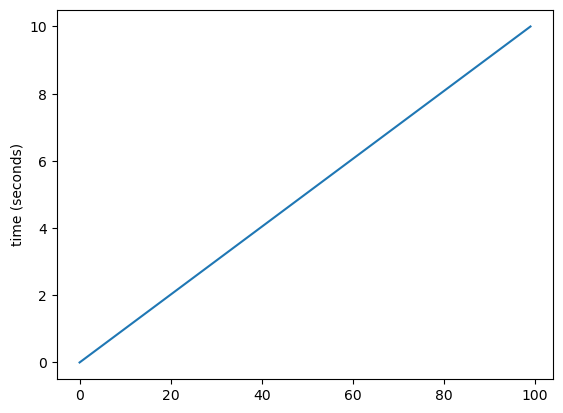

In [18]:
time_values = np.linspace(0,10,100)
plt.plot(time_values)
plt.ylabel('time (seconds)');

Now we will get the `y` coordinate of the bee over these 10 seconds. Instead of real data, we generate toy data by using the `np.sin()` function. We take the sine of the time value as the `y` coordinate of the bee.

In [19]:
y = np.sin(time_values)

Now let's plot the `y` coordinate of the bee over time.

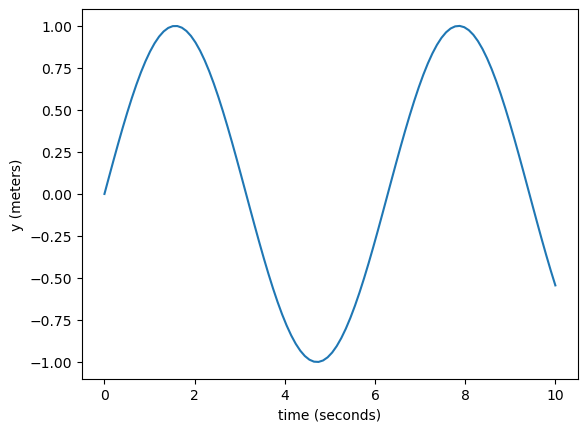

In [20]:
plt.plot(time_values,y)
plt.xlabel('time (seconds)');
plt.ylabel('y (meters)');

So our bee was oscillating in `y` over time.

In addition to a `y` coordinate, our tracking system also gives us `x` coordinates. Let's make some toy data for this,  too.

In [21]:
x = 0.5*np.sin(time_values*3.2)+1.1

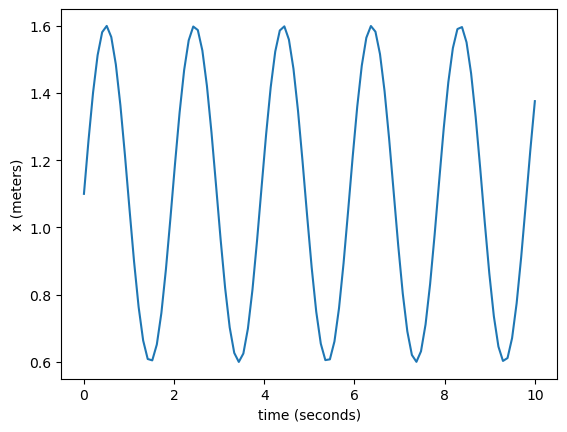

In [22]:
plt.plot(time_values,x)
plt.xlabel('time (seconds)');
plt.ylabel('x (meters)');

So the bee was also oscillating in `x`, and even faster than in `y`.

## Storing multiple dimensions data in single array

We might want to store our coordinates in a single multi-dimensional numpy array where the columns are time and the rows are the different coordinates (`x`, and `y`).

```
x0, x1, x2, ..., xn
y0, y1, y2, ..., yn
```

We can use the `np.vstack()` ("vertical stack") function for this. It will return a new array whose rows are the given in its input argument.

In [23]:
bee_coords = np.vstack((x,y))

By doing these, we can keep the different measurements together. Of course, we can still plot just a single dimension. Here is `x` over time again. In this case, the x axis is simply the index of the array passed to `plot()`:

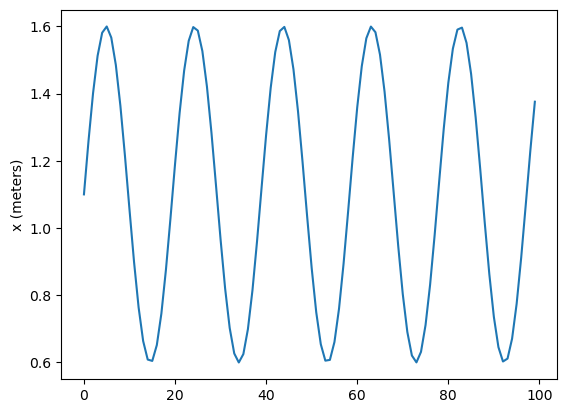

In [24]:
plt.plot(bee_coords[0])
plt.ylabel('x (meters)');

Of course, we can also plot the time value as the x axis and label it correctly:

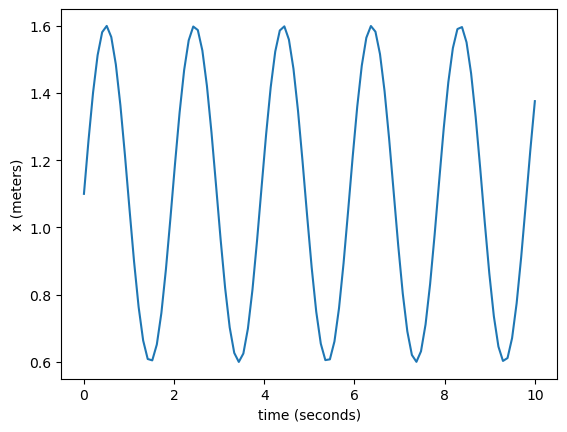

In [25]:
plt.plot(time_values, bee_coords[0])
plt.xlabel('time (seconds)');
plt.ylabel('x (meters)');

If `x` and `y` are horizontal positions, we can plot a "top view" of the bee position by plotting x against y:

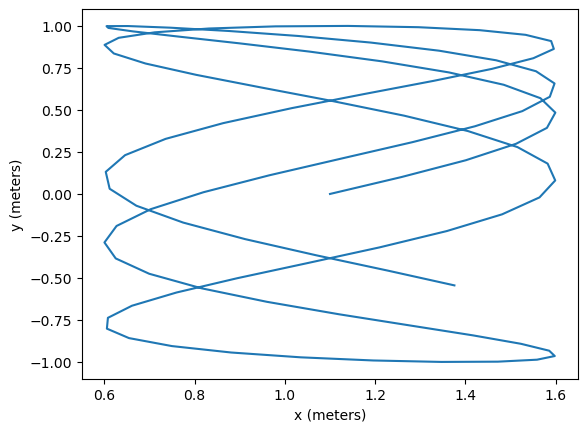

In [26]:
plt.plot(bee_coords[0], bee_coords[1])
plt.xlabel('x (meters)')
plt.ylabel('y (meters)');

Let's now calculate how far the bee is in any moment in time from a particular location. Remember the distance function we made in lecture:

```python
def compute_dist(a,b):
    """compute distance between two points, `a` and `b`
    
    `a` and `b` are each 2D sequences representing the coordinates of the point."""
    dx = b[0] - a[0]
    dy = b[1] - a[1]
    return np.sqrt( dx**2 + dy**2 )
```

We wrote this function with the idea that `a` and `b` are each a 2D point. With `a = (xa, ya)` and `b = (xb, yb)`.

Now we want a a function which returns the distance between a single input point `a` with coordinates `(xa, ya)` and each and every point in an array `bee_coords` which has shape `(2, n)`. So column `i` of `bee_coords` is thus a coordinate `(xi, yi)`.

Let's build up to this function piece-by-piece.

## Q8

First write a function called `compute_dx_squared` with the signature:

```python
def compute_dx_squared(a,b):
    """return the x distance squared between `a` and all points in `b`.
    
    `a` is a length 2 sequence with coordinates `(xa, ya)` and `b` is a numpy array of shape `(2, n)`.
    """
```

This function returns the squared `x` distance between point `a` (a length 2 sequence of the `x`,`y` coordinates of point `a`) and each coordinate in the 2D array `b` with shape `(2,n)`. Thus, for `a=[1.0,2.1]` and `b=np.array([[1,2,3],[4,5,6]])`, this will return `np.array([0., 1., 4.])`.

In [27]:
def compute_dx_squared(a, b):
    dx = b[0] - a[0]
    return dx**2

In [28]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(compute_dx_squared([1.0,2.1],np.array([[1,2,3],[4,5,6]])))=='1bacf727ce'
assert ads_hash(compute_dx_squared([1.0,2.1],np.array([[1,2,3,4.2],[4,5,6,8.2]])))=='c9c0596224'

## Q9

Now write a function called `compute_dy_squared` with the signature:

```python
def compute_dy_squared(a,b):
    """return the y distance squared between `a` and all points in `b`.
    
    `a` is a length 2 sequence with coordinates `(xa, ya)` and `b` is a numpy array of shape `(2, n)`.
    """
```

This function returns the squared `y` distance between point `a` (a length 2 sequence of the `x`,`y` coordinates of point `a`) and each coordinate in the 2D array `b` with shape `(2,n)`. Thus, for `a=[1.0,2.1]` and `b=np.array([[1,2,3],[4,5,6]])`, this will return `array([ 3.61,  8.41, 15.21])`.

In [29]:
def compute_dy_squared(a, b):
    dy = b[1] - a[1]
    return dy**2

In [30]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(compute_dy_squared([1.0, 2.1], np.array([[1,2,3],[4,5,6]])))=='759d96c1e4'
assert ads_hash(compute_dy_squared([1.0, 2.1], np.array([[1,2,3,1.2],[4,5,6,-3]])))=='cb574f3c8e'

## Q10

Now write a function called `compute_distance` with the signature:

```python
def compute_distance(a,b):
    """return the distance between `a` and all points in `b`.
    
    `a` is a length 2 sequence with coordinates `(xa, ya)` and `b` is a numpy array of shape `(2, n)`.
    """
```

This function returns the distance between point `a` (a length 2 sequence of the `x`,`y` coordinates of point `a`) and each coordinate in the 2D array `b` with shape `(2,n)`. Thus, for `a=[1.0,2.1]` and `b=np.array([[1,2,3],[4,5,6]])`, this will return `array([1.9       , 3.06757233, 4.3829214 ])`.

In [31]:
def compute_distance(a, b):
    dx = b[0] - a[0]
    dy = b[1] - a[1]
    return np.sqrt(dx**2 + dy**2)

In [32]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(compute_distance([1.0, 2.1], np.array([[1,2,3],[4,5,6]])))=='1e2fc6c5fd'
assert ads_hash(compute_distance([1.0, 2.1], np.array([[1,2,3,10.1],[4,5,6,-2.2]])))=='b7ef5a80ae'

## Q11

Now let's imagine you upgraded your tracking system to work in 3 dimensions and now you collect data in `x`, `y` and `z`. Write a function called `compute_distance_3d` with the signature:

```python
def compute_distance_3d(a,b):
    """return the distance between `a` and all points in `b`.
    
    `a` is a length 3 sequence with coordinates `(xa, ya, za)` and `b` is a numpy array of shape `(3, n)`.
    """
```

This function returns the distance between point `a` (a length 3 sequence of the `x`,`y`,`z` coordinates of point `a`) and each coordinate in the 2D array `b` with shape `(3,n)`. Thus, for `a=[1.0,2.1,0.0]` and `b=np.array([[1,2,3],[4,5,6],[7,8,9]])`, this will return `np.array([ 7.25327512,  8.56796359, 10.01049449])`.

Remember that the formula for distance in 3D is:

```
distance = sqrt( dx**2 + dy**2 + dz**2 )
```

where `dx` is the distance along the `x` direction, `dy` is the distance along the `y` direction, and `dz` is the distance along the `z` direction, 

In [33]:
def compute_distance_3d(a, b):
    dx = b[0] - a[0]
    dy = b[1] - a[1]
    dz = b[2] - a[2]
    return np.sqrt(dx**2 + dy**2 + dz**2)

In [34]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(compute_distance_3d([1.0,2.1,0.0], np.array([[1,2,3],[4,5,6],[7,8,9]])))=='6f84b17de0'
assert ads_hash(compute_distance_3d([1.0,2.1,0.1], np.array([[1,2,3,0.0],[4,5,6,1.0],[7,8,9.2,0.0]])))=='0b9c9c17b1'